__Importing the libraries__

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [85]:
data=pd.read_csv(r"D:\RESUME ML PROJECTS\Google Play Store Prediction\notebook\googleplaystore.csv")

In [86]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [87]:
data.shape

(10841, 13)

In [88]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [89]:
# remove null values
data.dropna(inplace=True)

In [90]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [91]:
data.duplicated().sum()

474

In [92]:
# remove duplicates
data.drop_duplicates(inplace=True)

In [93]:
data.duplicated().sum()

0

In [94]:
data.shape

(8886, 13)

In [95]:
data.describe()

Rating
count  8886.000000
mean      4.187959
std       0.522428
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000

In [96]:
categorical_cols=data.select_dtypes(include="object").columns
numerical_cols=data.select_dtypes(exclude="object").columns

In [97]:
print(f'categorical cols length is: {len(categorical_cols)} and categorical cols is: {categorical_cols}')

print(f'numerical cols length is: {len(numerical_cols)} and numerical cols is: {numerical_cols}')

categorical cols length is: 12 and categorical cols is: Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
numerical cols length is: 1 and numerical cols is: Index(['Rating'], dtype='object')


In [98]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [99]:
print(f"unique values in app is {data['App'].unique()}")

unique values in app is ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Fr. Mike Schmitz Audio Teachings' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


In [100]:
print(f"unique values in app is {data['Reviews'].unique()}")

unique values in app is ['159' '967' '87510' ... '603' '1195' '398307']


In [101]:
data['Reviews'].dtype

dtype('O')

In [102]:
data['Reviews']=data['Reviews'].astype('int')

In [103]:
data['Reviews'].dtype

dtype('int32')

In [104]:
data['Size']=data['Size'].replace("Varies with device",'')

In [105]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', '', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M',
       '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M',
       '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M',
       '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M',
       '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M', '3.7M',
       '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M', '3.0M',
       '7.2M', '

In [106]:
def convert_size(size):
    if size.endswith('M'):
        return float(size[:-1])
    elif size.endswith('K'):
        return float(size[:-1])/1024
    else:
        return None

In [107]:
data['Size']=data['Size'].apply(lambda x:convert_size(str(x)))

In [108]:
data['Size'].unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   5.5,  17. ,  39. ,  31. ,
         4.2,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,  11. ,  24. ,
         nan,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,   7.9,  56. ,
        57. ,  35. ,  54. ,   3.6,   5.7,   8.6,   2.4,  27. ,   2.7,
         2.5,   7. ,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,  32. ,
         5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,   6.7,
        30. ,   2.6,   7.1,  22. ,   6.4,   3.2,   8.2,   4.9,   9.5,
         5. ,   5.9,  13. ,  73. ,   6.8,   3.5,   4. ,   2.3,   2.1,
        42. ,   9.1,  55. ,   7.3,   6.5,   1.5,   7.5,  51. ,  41. ,
        48. ,   8.5,  46. ,   8.3,   4.3,   4.7,   3.3,  40. ,   7.8,
         8.8,   6.6,   5.1,  61. ,  66. ,   8.4,   3.7,  44. ,   1.6,
         6.2,  53. ,   1.4,   3. ,   7.2,   5.8,   3.8,   9.6,  45. ,
        63. ,  49. ,  77. ,   4.4,  70. ,   9.3,   8.1,  36. ,   6.9,
         7.4,  84. ,

In [109]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [110]:
data['Installs']=data['Installs'].str.replace("+",'')

In [111]:
data['Installs']=data['Installs'].str.replace(",",'').astype('int')

In [112]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [113]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [114]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [115]:
data['Price']=data['Price'].str.replace('$','').astype('float')

In [116]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [117]:
# 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
    #    'Android Ver'

In [118]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [119]:
data['Content Rating'].dtype

dtype('O')

In [120]:
data['Content Rating']=data['Content Rating'].str.replace('+','')

In [121]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10', 'Mature 17', 'Adults only 18',
       'Unrated'], dtype=object)

In [122]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [123]:
data['Last Updated'].dtype

dtype('O')

In [124]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])

In [125]:
data['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2013-08-16 00:00:00', '2016-07-10 00:00:00', '2015-12-26 00:00:00',
 '2015-11-23 00:00:00', '2017-07-30 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1299, dtype: datetime64[ns]

In [126]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [127]:
data=data.drop(columns=["Current Ver",	"Android Ver"],axis=1)

In [128]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated  
0               Art & Design   2018-01-07  
1  Art & Design;Pretend Play   2018-01-15  
2               Art & Design   2018-08-01  
3               Art & Design   2018-06-08  
4    Art & Design;Creativity   2018-06-20

In [129]:
numerical_colscategorical_cols=data.select_dtypes(include="object").columns
numerical_cols=data.select_dtypes(exclude="object").columns

In [130]:
print(f"numerical_cols are {numerical_cols}")
print(f"categorical cols are {categorical_cols}")

numerical_cols are Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated'], dtype='object')
categorical cols are Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [131]:
numerical_cols

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated'], dtype='object')

In [132]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated  
0               Art & Design   2018-01-07  
1  Art & Design;Pretend Play   2018-01-15  
2               Art & Design   2018-08-01  
3               Art & Design   2018-06-08  
4    Art & Design;Creativity   2018-06-20

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   int32         
 4   Size            7162 non-null   float64       
 5   Installs        8886 non-null   int32         
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 763.6+ KB


__Visualization__

In [134]:
data.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   

                      Genres Last Updated  
0               Art & Design   2018-01-07  
1  Art & Design;Pretend Play   2018-01-15  
2               Art & Design   2018-08-01

<Axes: xlabel='count', ylabel='Category'>

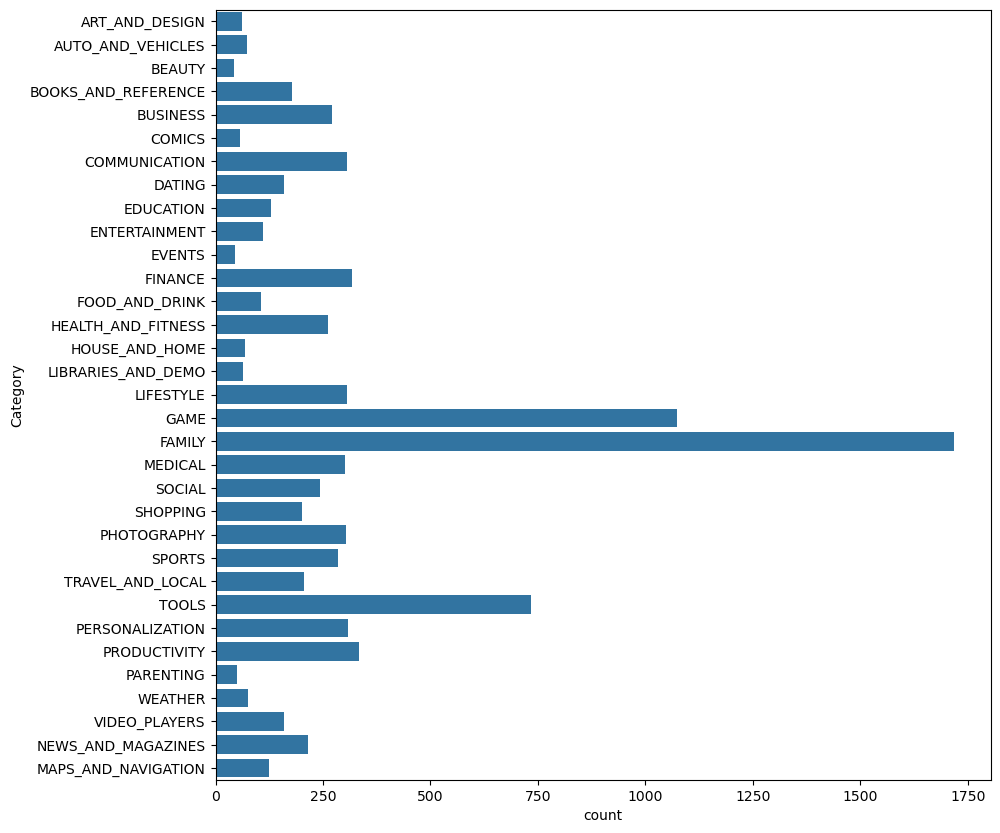

In [135]:
plt.figure(figsize=(10,10))
sns.countplot(data['Category'])

<Axes: ylabel='count'>

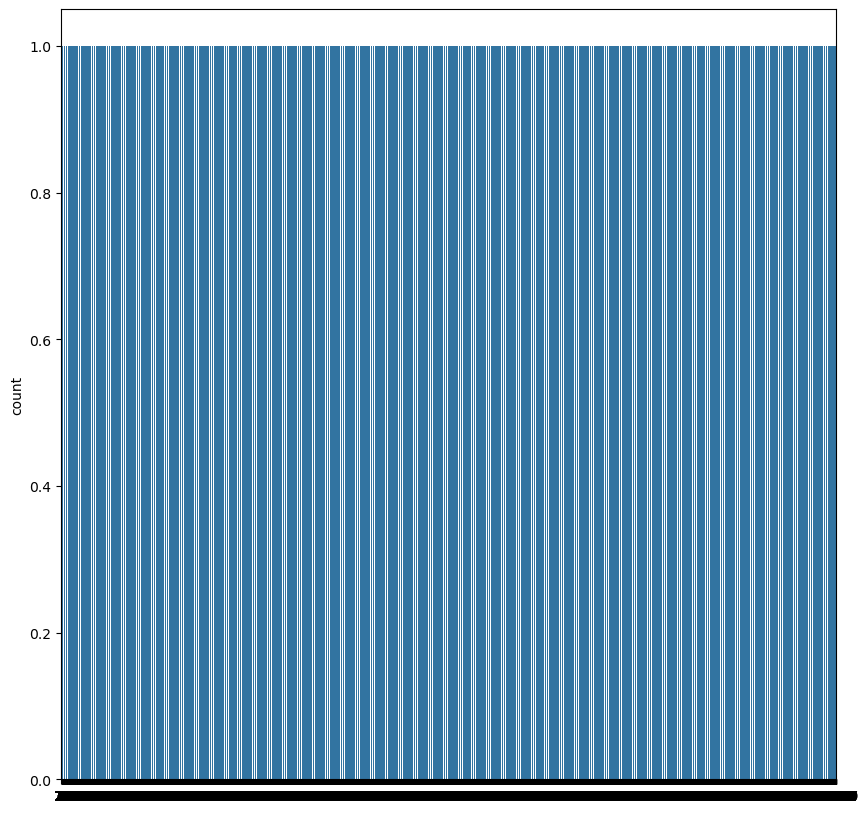

In [136]:
plt.figure(figsize=(10,10))
sns.countplot(data['Price'])

<Axes: xlabel='count', ylabel='Content Rating'>

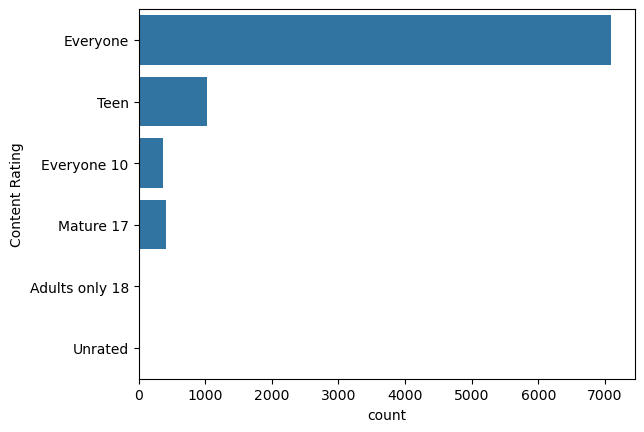

In [137]:
sns.countplot(data['Content Rating'])

In [138]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated  
0               Art & Design   2018-01-07  
1  Art & Design;Pretend Play   2018-01-15  
2               Art & Design   2018-08-01  
3               Art & Design   2018-06-08  
4    Art & Design;Creativity   2018-06-20

In [139]:
!pip install nltk

In [140]:
import os
print(os.listdir())  # Lists all files in the current directory


['experiment.ipynb', 'googleplaystore.csv']


In [141]:
# !pip uninstall nltk
# !pip install nltk


In [142]:
# !pip uninstall nltk

In [143]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import re
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated  
0               Art & Design   2018-01-07  
1  Art & Design;Pretend Play   2018-01-15  
2               Art & Design   2018-08-01  
3               Art & Design   2018-06-08  
4    Art & Design;Creativity   2018-06-20

In [145]:
lemmatizer=WordNetLemmatizer()
def clean_data(s):
    review=re.sub('[^a-z A-Z 0-9]','',s)
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    return review

In [146]:
data['App']=data['App'].apply(lambda x:clean_data(x))

In [147]:
data.head()

App        Category  Rating  \
0        photo editor candy camera grid scrapbook  ART_AND_DESIGN     4.1   
1                             coloring book moana  ART_AND_DESIGN     3.9   
2  u launcher lite free live cool theme hide apps  ART_AND_DESIGN     4.7   
3                               sketch draw paint  ART_AND_DESIGN     4.5   
4             pixel draw number art coloring book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated  
0               Art & Design   2018-01-07  
1  Art & Design;Pretend Play   2018-01-15  
2               Art & Design   2018-08-01  
3               Art & Design   2018-06-08  
4    Art & Design;Creativity   2018-06-20

In [148]:
x=data.drop(columns="Rating")
y=data["Rating"]

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   int32         
 4   Size            7162 non-null   float64       
 5   Installs        8886 non-null   int32         
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 763.6+ KB


In [150]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Category']=label_encoder.fit_transform(data['Category'])
data['Type']=label_encoder.fit_transform(data['Type'])
data['Content Rating']=label_encoder.fit_transform(data['Content Rating'])
data['Genres']=label_encoder.fit_transform(data['Genres'])

In [151]:
data.head()

App  Category  Rating  Reviews  \
0        photo editor candy camera grid scrapbook         0     4.1      159   
1                             coloring book moana         0     3.9      967   
2  u launcher lite free live cool theme hide apps         0     4.7    87510   
3                               sketch draw paint         0     4.5   215644   
4             pixel draw number art coloring book         0     4.3      967   

   Size  Installs  Type  Price  Content Rating  Genres Last Updated  
0  19.0     10000     0    0.0               1       9   2018-01-07  
1  14.0    500000     0    0.0               1      11   2018-01-15  
2   8.7   5000000     0    0.0               1       9   2018-08-01  
3  25.0  50000000     0    0.0               4       9   2018-06-08  
4   2.8    100000     0    0.0               1      10   2018-06-20

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   int32         
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   int32         
 4   Size            7162 non-null   float64       
 5   Installs        8886 non-null   int32         
 6   Type            8886 non-null   int32         
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   int32         
 9   Genres          8886 non-null   int32         
 10  Last Updated    8886 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(6), object(1)
memory usage: 624.8+ KB


In [182]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [183]:
# x_train.shape

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf=TfidfVectorizer()
# x_train=tfidf.fit_transform(x_train).toarray()

In [185]:
# x_train

In [187]:
# y_train.shape

In [188]:
# print(x.shape,x_train.shape,x_test.shape)

In [189]:
# print(y.shape,y_train.shape,y_test.shape)

In [200]:
# tfidf = TfidfVectorizer(max_features=1000)
# # Apply TF-IDF
# tfidf = TfidfVectorizer(max_features=1000)  # Reduce vocabulary size to avoid too many features
# X_tfidf = tfidf.fit_transform(data['App'])  # Sparse matrix

# # Convert sparse TF-IDF matrix to dense (NumPy array)
# X_dense = X_tfidf.toarray()

In [201]:
# pd.DataFrame(X_dense).head()

In [194]:
final_data.head()

Category  Rating   Reviews  Size    Installs  Type  Price  Content Rating  \
0       0.0     4.1     159.0  19.0     10000.0   0.0    0.0             1.0   
1       0.0     3.9     967.0  14.0    500000.0   0.0    0.0             1.0   
2       0.0     4.7   87510.0   8.7   5000000.0   0.0    0.0             1.0   
3       0.0     4.5  215644.0  25.0  50000000.0   0.0    0.0             4.0   
4       0.0     4.3     967.0   2.8    100000.0   0.0    0.0             1.0   

   Genres Last Updated  ...  word  workout  world  write  xperia  yahoo  yoga  \
0     9.0   2018-01-07  ...   0.0      0.0    0.0    0.0     0.0    0.0   0.0   
1    11.0   2018-01-15  ...   0.0      0.0    0.0    0.0     0.0    0.0   0.0   
2     9.0   2018-08-01  ...   0.0      0.0    0.0    0.0     0.0    0.0   0.0   
3     9.0   2018-06-08  ...   0.0      0.0    0.0    0.0     0.0    0.0   0.0   
4    10.0   2018-06-20  ...   0.0      0.0    0.0    0.0     0.0    0.0   0.0   

   youtube  zenui  zombie  
0      0.0    0.0     0.0  
1      0.0    0.0     0.0  
2      0.0    0.0     0.0  
3      0.0    0.0     0.0  
4      0.0    0.0     0.0  

[5 rows x 1010 columns]

In [202]:
# x=final_data.drop(columns="Rating")
# y=final_data["Rating"]

In [203]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=300)  # Reduce to 300 principal components
# X_reduced = pca.fit_transform(X_tfidf.toarray())

In [204]:
from sklearn.decomposition import PCA
# Step 1: Apply TF-IDF on the 'App' column
tfidf = TfidfVectorizer(max_features=1000)  # Reduce vocabulary size
X_tfidf = tfidf.fit_transform(data['App'])  # Sparse matrix

# Convert sparse TF-IDF matrix to dense format
X_dense = X_tfidf.toarray()  

# Step 2: Apply Label Encoding on 'Category' column
le = LabelEncoder()
data['Category_encoded'] = le.fit_transform(data['Category'])  # Convert categories to numbers
data['Type']=label_encoder.fit_transform(data['Type'])
data['Content Rating']=label_encoder.fit_transform(data['Content Rating'])
data['Genres']=label_encoder.fit_transform(data['Genres'])

# Step 3: Select Features & Target Variable
X = np.hstack((X_dense, data[['Category_encoded','Type','Content Rating','Genres']].values))  # Combine TF-IDF & encoded category
y = data['Rating']  # Replace with actual target column if different

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply PCA (only on train, then transform test)
pca = PCA(n_components=300)  # Reduce dimensions to 300
X_train_pca = pca.fit_transform(X_train)  # Fit and transform on train
X_test_pca = pca.transform(X_test)  # Only transform on test

# Print shapes
print("X_train shape after PCA:", X_train_pca.shape)  # (train_size, 300)
print("X_test shape after PCA:", X_test_pca.shape)    # (test_size, 300)

X_train shape after PCA: (7108, 300)
X_test shape after PCA: (1778, 300)


In [219]:
y_train

190     4.3
9911    5.0
2581    4.5
4989    4.6
7917    3.5
       ... 
6765    2.5
6042    3.7
6299    4.0
1070    4.1
8758    4.5
Name: Rating, Length: 7108, dtype: float64

<Axes: >

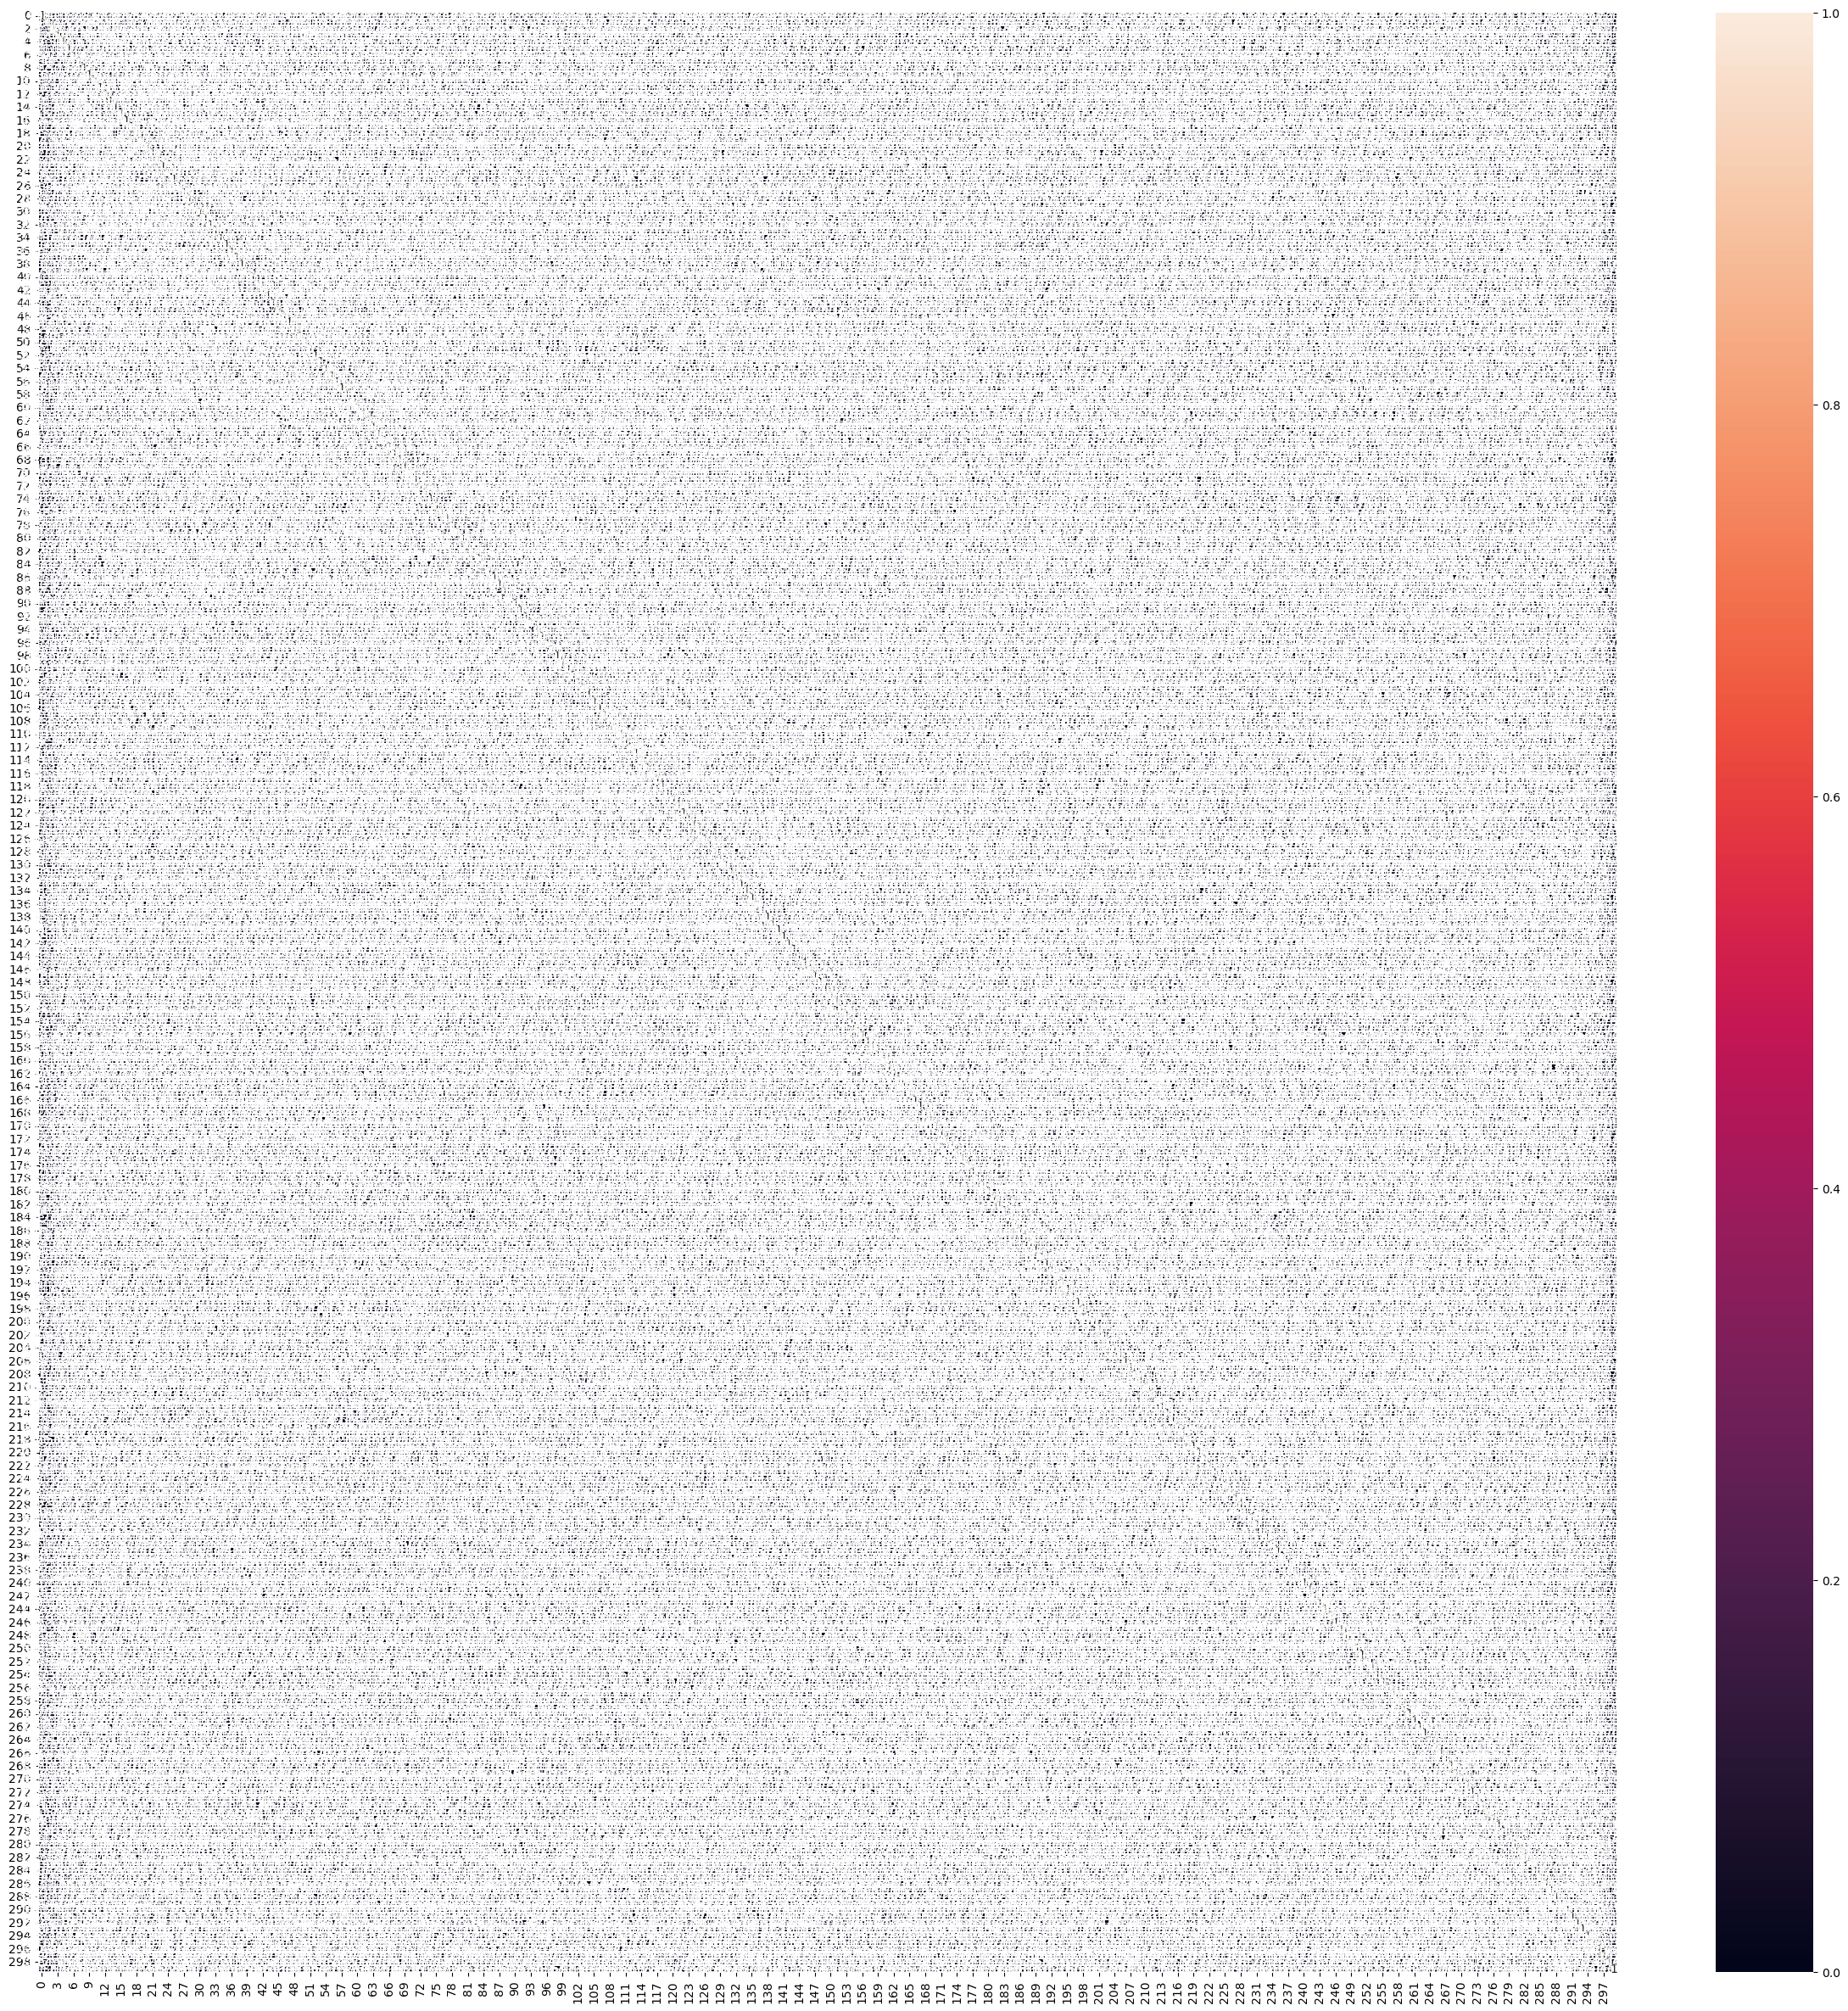

In [208]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.DataFrame(X_train_pca).corr(),annot=True)

In [211]:
X_train_pca.shape


(7108, 300)

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [222]:
data['Rating'].value_counts()

Rating
4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

In [223]:
models={
    "LinearRegression":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),


}

In [225]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def evaluate(y_true, y_pred):
    r2score = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)  # Corrected function name
    
    mae = mean_absolute_error(y_true, y_pred)  # Added recall

    return r2score, mse, mae

In [218]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8886, dtype: float64

In [ ]:
# Lists to store model names and r2 scores
model_list = []
r2_scores = []

for i in range(len(list(models.values()))):
    model_name=list(models.keys())[i]
    model=list(models.values())[i]
    model.fit(X_train_pca,y_train)

    y_pred=model.predict(X_train_pca)
    print(y_pred)


    y_pred_tets=model.predict(X_test_pca)
    print(y_pred_tets)





    r2score_train,mse_train,mae_train=evaluate(y_train,y_pred)
    

    r2score_test,mse_test,mae_test=evaluate(y_test,y_pred_tets)

    

    print(f"model name {model_name}")
    model_list.append(model_name)

     # Print training performance
    print("Performance for Train Data")
    # print(f"f1_train: {f1_train:.4f}")
    # print(f"precision_train: {precision_train:.4f}")
    print(f"accuray_train: {r2score_train:.4f}")
    
    print("--------------------------------------------------")
    
    # Print test performance
    print("Performance for Test Data")
    # print(f"f1_test: {f1_test:.4f}")
    # print(f"precision_test: {precision_test:.4f}")
    print(f"accuray_test: {r2score_test:.4f}")
    r2_scores.append(r2score_test)
    
    print("=" * 35)
    print('\n')

[3.98078359 4.16724928 4.45551784 ... 4.1278341  4.15705375 4.40431735]
[4.19722077 4.27139679 4.09658009 ... 4.51629377 4.11432566 4.12150426]
model name LinearRegression
Performance for Train Data
accuray_train: 0.1438
--------------------------------------------------
Performance for Test Data
accuray_test: 0.0497


